# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_squared_error

# Load the dataset

In [2]:
data = pd.read_csv('houseprice.csv')

In [3]:
data.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Living Area  1047 non-null   float64
 1   Bathrooms    1047 non-null   float64
 2   Bedrooms     1047 non-null   int64  
 3   Lot Size     1047 non-null   float64
 4   Age          1047 non-null   int64  
 5   Fireplace    1047 non-null   int64  
 6   Price        1047 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 57.4 KB


In [5]:
data.columns

Index(['Living Area', 'Bathrooms', 'Bedrooms', 'Lot Size', 'Age', 'Fireplace',
       'Price'],
      dtype='object')

# to check null values

In [6]:
data.isnull().sum()

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1042    False
1043    False
1044    False
1045    False
1046    False
Length: 1047, dtype: bool

In [8]:
data.dtypes

Living Area    float64
Bathrooms      float64
Bedrooms         int64
Lot Size       float64
Age              int64
Fireplace        int64
Price          float64
dtype: object

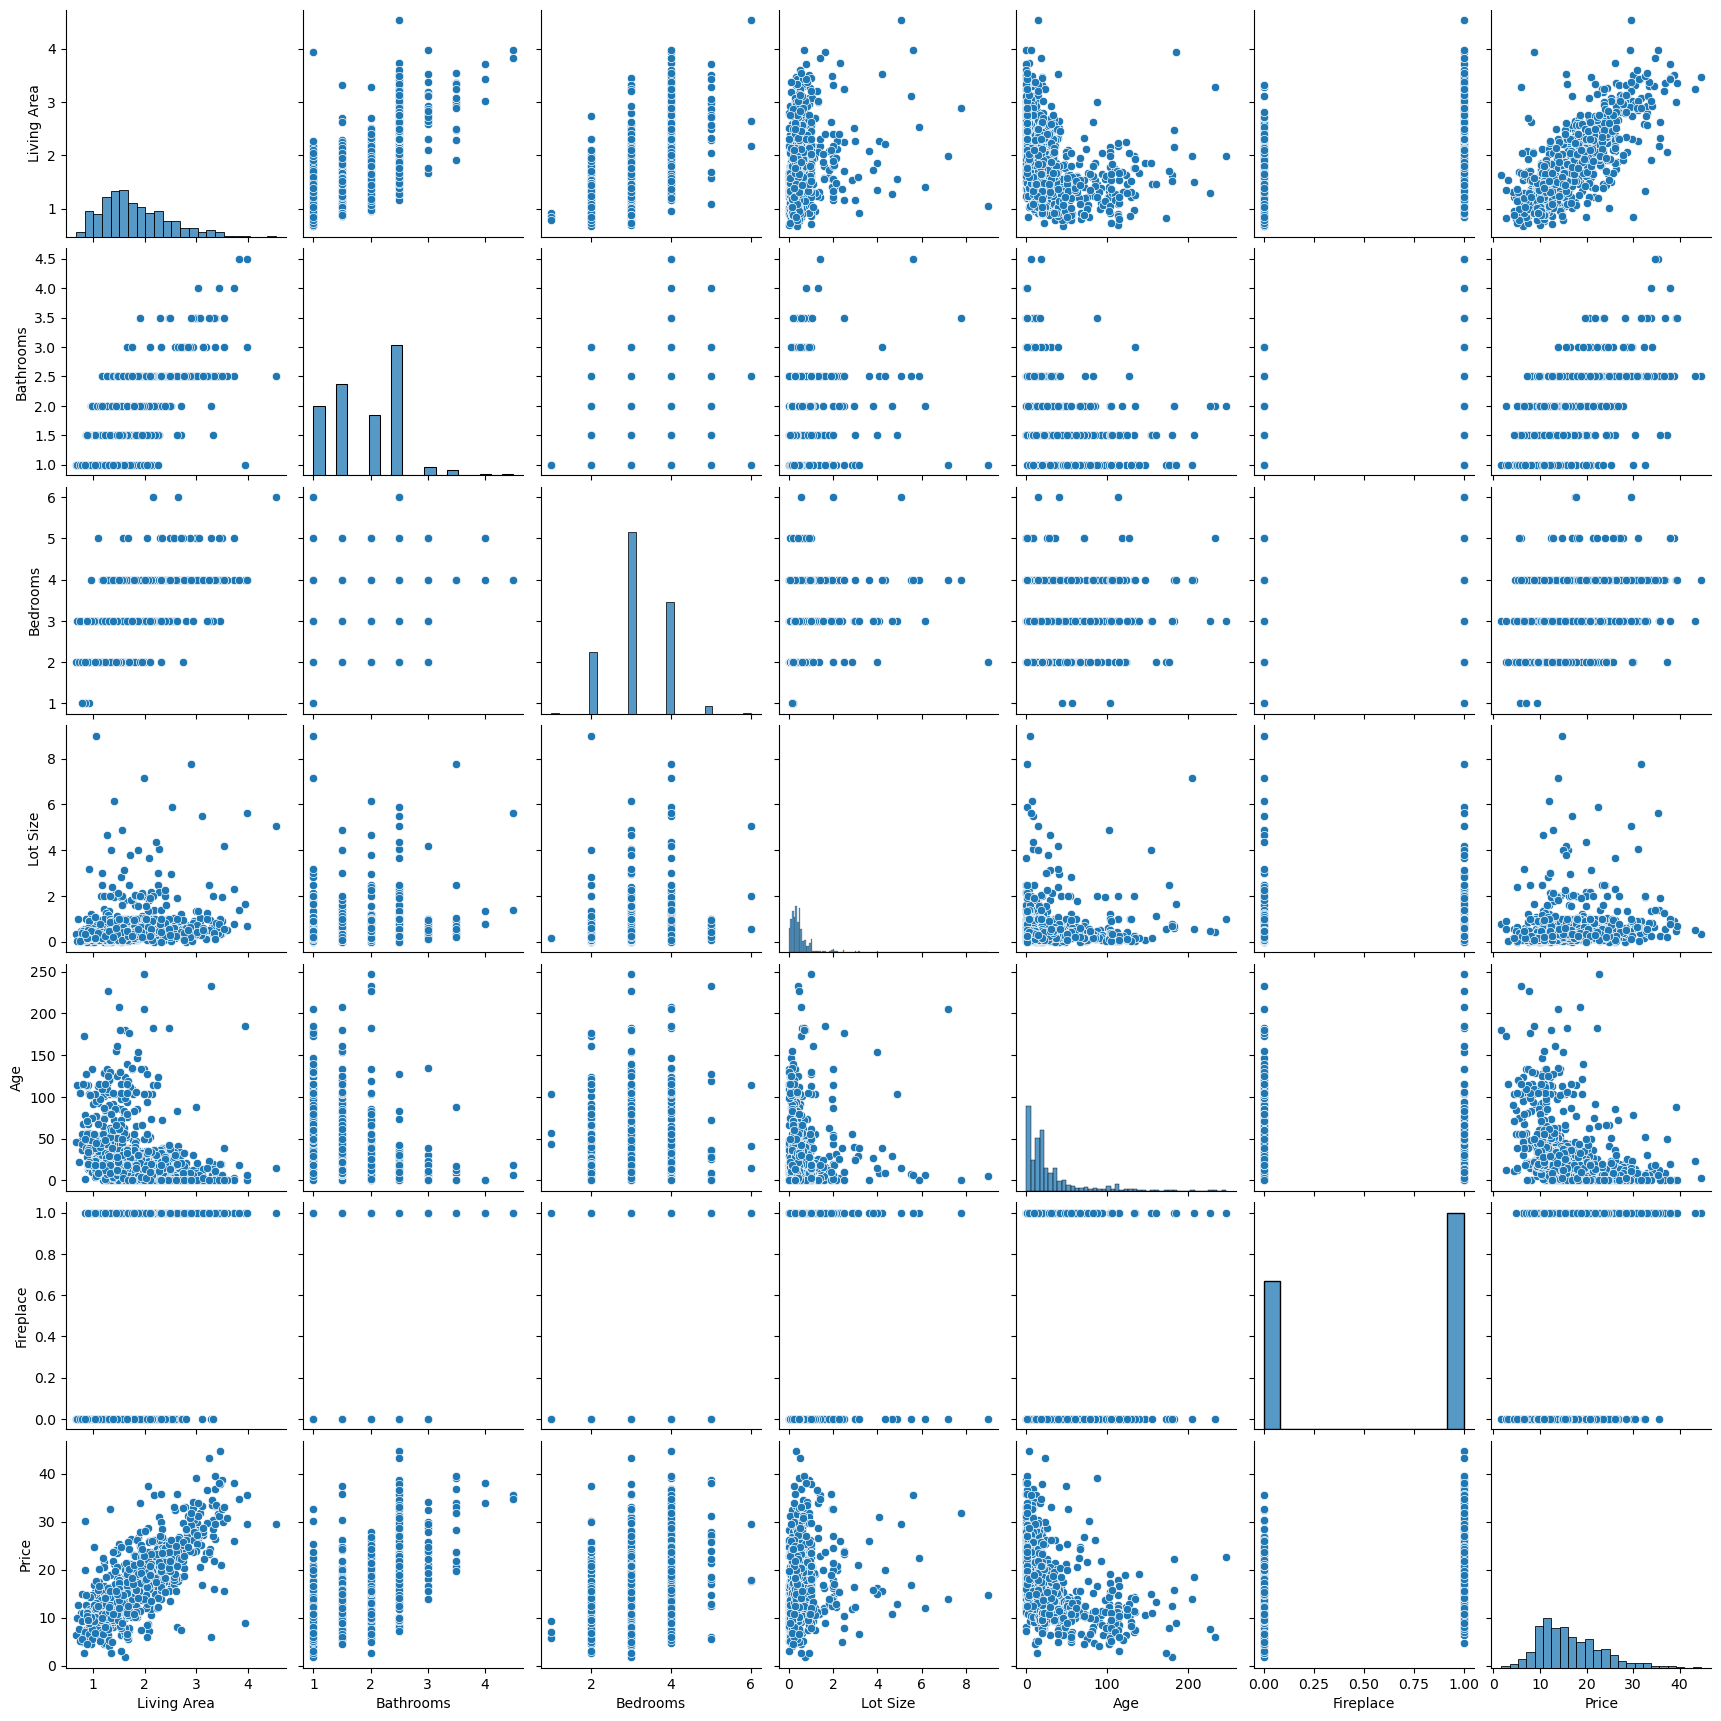

In [9]:
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'Living Area'}>,
        <AxesSubplot:title={'center':'Bathrooms'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'Lot Size'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fireplace'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

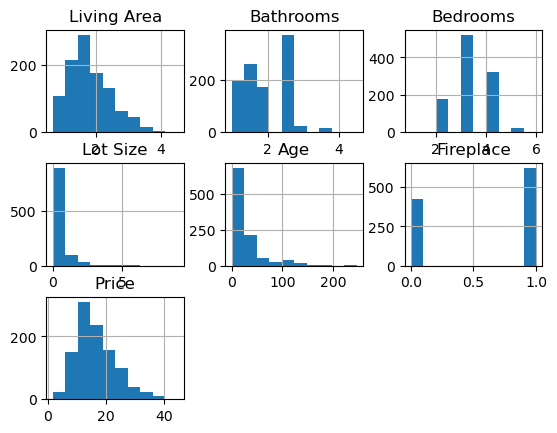

In [30]:
plt.figure(figsize=(10,10))
data.hist()

<AxesSubplot:>

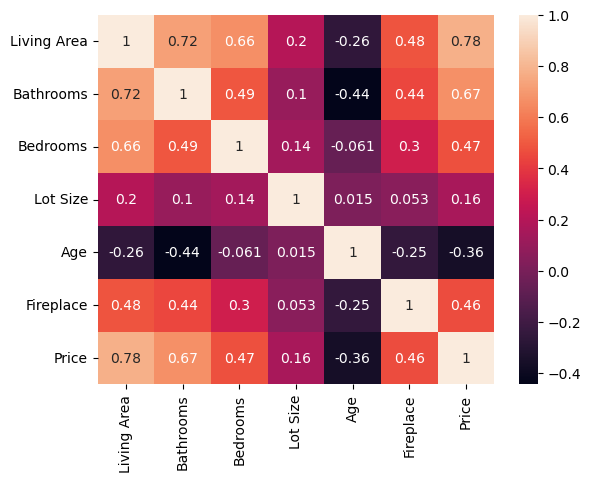

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# feature selection

In [13]:
from sklearn.feature_selection import mutual_info_regression

In [14]:

mi = mutual_info_regression(xtrain, ytrain)
mi = pd.Series(mi)
mi.index = xtrain.columns
selected_features = mi.sort_values(ascending=False).index[:4]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Living Area', 'Bathrooms', 'Age', 'Lot Size'], dtype='object')


In [15]:
xtrain = xtrain[selected_features]
xtest =  xtest[selected_features]

In [16]:
xtrain

,Living Area,Bathrooms,Age,Lot Size
281,1.708,1.0,39,0.87
266,1.314,1.5,19,0.10
497,2.572,2.5,9,0.94
568,1.635,1.5,52,0.28
833,2.714,3.0,1,0.55
...,...,...,...,...
330,1.560,1.0,43,2.00
466,2.068,2.5,17,0.46
121,2.815,2.5,1,0.48
1044,1.440,2.0,66,0.61


In [17]:
xtest

,Living Area,Bathrooms,Age,Lot Size
352,2.284,1.5,29,0.28
560,1.921,2.0,0,1.00
874,2.472,3.5,0,0.31
980,1.022,1.0,55,0.44
31,0.813,1.0,68,0.39
...,...,...,...,...
97,1.629,1.0,180,0.76
828,3.144,2.5,1,0.49
685,0.840,1.0,57,0.18
423,3.356,2.5,6,0.34


# Normalization

In [18]:
scaler = MinMaxScaler()

In [19]:
xtrain = scaler.fit_transform(xtrain)

In [20]:
xtest = scaler.fit_transform(xtest)

# Building a model


In [21]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

# Mean-Squared-Error

In [22]:
pred = model.predict(xtest)
mean_squared_error(pred,ytest)

16.904462458534532

# R-Squared Error

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(ytest, pred)
print(r2)

0.6409302964031822


# Mean-Absolute-Error

In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest,pred)
mae

2.867881530462839